In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics
import random

import sys
sys.path.append('../')
import dataimport.prepareDataset as prep

In [2]:
random.seed(141)

are there features which don't have any further content/ don't change over the whole periode


In [3]:
Part_chro=['13','22','10', '18']
Part_reco=['19','20','02','09']

In [4]:
[X_Base,X_Anes,X_Reco,Y_ID_Base,Y_ID_Anes,Y_ID_Reco,
 Y_out_Anes,Y_out_Base,Y_out_Reco ]=prep.prepare_Dataset('data/combined_NEW_wPLI_dPLI_all_10_1_left.pickle')

In [5]:
X_Base.head()

,"(w_FC,)","(w_FP,)","(w_FO,)","(w_FT,)","(w_TO,)","(w_TC,)","(w_TP,)","(w_PO,)","(w_PC,)","(w_CO,)",...,"(d_TC,)","(d_TP,)","(d_PO,)","(d_PC,)","(d_CO,)","(d_FF,)","(d_CC,)","(d_PP,)","(d_TT,)","(d_OO,)"
0,0.030100,0.102461,0.083395,0.256052,0.146547,0.074338,0.027390,0.120817,0.088814,0.031885,...,0.512624,0.533130,0.541518,0.511450,0.510751,0.603490,0.527621,0.520629,0.537286,0.555800
1,0.046712,0.124563,0.113504,0.263555,0.198018,0.042305,0.045180,0.080966,0.058868,0.032764,...,0.529521,0.535862,0.536703,0.517674,0.503397,0.572565,0.520864,0.514560,0.499971,0.537907
2,0.034299,0.067931,0.089008,0.187401,0.158253,0.020782,0.035091,0.042455,0.014485,0.009107,...,0.510873,0.545460,0.555764,0.506364,0.489656,0.591493,0.506064,0.533342,0.502762,0.559013
3,0.043933,0.066618,0.118669,0.201711,0.232408,0.042731,0.056514,0.056289,0.016804,0.020726,...,0.511549,0.550265,0.532715,0.497733,0.494872,0.541932,0.501477,0.521295,0.526248,0.545173
4,0.046567,0.064251,0.112513,0.237110,0.235733,0.066263,0.074693,0.041756,0.019001,0.022693,...,0.531602,0.565340,0.516448,0.494579,0.490313,0.538810,0.490438,0.517240,0.526390,0.529853


define 30% test set 
!!!! only used to select the hyperparameters 

In [6]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y_out,Y_ID,random_state=0,test_size=0.3)
X_train_Base,X_test_Base,Y_train_Base,Y_test_Base,Y_ID_Base_train,Y_ID_Base_test=train_test_split(X_Base,Y_out_Base,Y_ID_Base,random_state=0,test_size=0.3)
X_train_Reco,X_test_Reco,Y_train_Reco,Y_test_Reco,Y_ID_Reco_train,Y_ID_Reco_test=train_test_split(X_Reco,Y_out_Reco,Y_ID_Reco,random_state=0,test_size=0.3)
X_train_Anes,X_test_Anes,Y_train_Anes,Y_test_Anes,Y_ID_Anes_train,Y_ID_Anes_test=train_test_split(X_Anes,Y_out_Anes,Y_ID_Anes,random_state=0,test_size=0.3)


In [7]:
#lr=LogisticRegression(random_state=0,penalty='l1',C=4,solver='liblinear',max_iter=10000)

#score_B, permutation_scores_B, pvalue_B = permutation_test_score(
#    lr, X_Base,Y_out_Base, scoring="accuracy", n_permutations=100, n_jobs=-1,cv=3)

#score_A, permutation_scores_A, pvalue_A = permutation_test_score(
#    lr, X_Anes,Y_out_Anes, scoring="accuracy", n_permutations=100, n_jobs=-1,cv=3)

#score_R, permutation_scores_R, pvalue_R = permutation_test_score(
#    lr, X_Reco,Y_out_Reco, scoring="accuracy", n_permutations=100, n_jobs=-1,cv=3)



In [8]:
# View histogram of permutation scores
"""
plt.figure(figsize= [15, 6])
plt.subplot(131)
plt.hist(permutation_scores_B, 20, label='Permutation scores Baseline')
ylim = plt.ylim()
plt.plot(2 * [score_B], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue_B)
plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')
plt.legend()
plt.xlabel('Score')

plt.subplot(132)
plt.hist(permutation_scores_A, 20, label='Permutation scores Anesthesia')
ylim = plt.ylim()
plt.plot(2 * [score_A], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue_A)
plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')
plt.legend()
plt.xlabel('Score')

plt.subplot(133)
plt.hist(permutation_scores_R, 20, label='Permutation scores Recovery')
ylim = plt.ylim()
plt.plot(2 * [score_R], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue_R)
plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')

plt.legend()
plt.xlabel('Score')
plt.savefig('combined_LogReg_permutation.png',dpi=150)
"""

"\nplt.figure(figsize= [15, 6])\nplt.subplot(131)\nplt.hist(permutation_scores_B, 20, label='Permutation scores Baseline')\nylim = plt.ylim()\nplt.plot(2 * [score_B], ylim, '--g', linewidth=3,\n         label='Classification Score'\n         ' (pvalue %s)' % pvalue_B)\nplt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')\nplt.legend()\nplt.xlabel('Score')\n\nplt.subplot(132)\nplt.hist(permutation_scores_A, 20, label='Permutation scores Anesthesia')\nylim = plt.ylim()\nplt.plot(2 * [score_A], ylim, '--g', linewidth=3,\n         label='Classification Score'\n         ' (pvalue %s)' % pvalue_A)\nplt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')\nplt.legend()\nplt.xlabel('Score')\n\nplt.subplot(133)\nplt.hist(permutation_scores_R, 20, label='Permutation scores Recovery')\nylim = plt.ylim()\nplt.plot(2 * [score_R], ylim, '--g', linewidth=3,\n         label='Classification Score'\n         ' (pvalue %s)' % pvalue_R)\nplt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, lab

In [9]:
"""
data = [[score_B, pvalue_B], 
        [score_A, pvalue_A],
        [score_R, pvalue_R]]

pd.DataFrame(data, columns=["permutation LR", "pvalue"],index=['Baseline','Anesthesia','Recovery'])
"""

'\ndata = [[score_B, pvalue_B], \n        [score_A, pvalue_A],\n        [score_R, pvalue_R]]\n\npd.DataFrame(data, columns=["permutation LR", "pvalue"],index=[\'Baseline\',\'Anesthesia\',\'Recovery\'])\n'

LOGISTIC REGRESSION
  I Hyperparameter search

In [10]:


cs=np.arange(1,8,0.5)
lr_accuracy_Base=[]
lr_accuracy_Anes=[]
lr_accuracy_Reco=[]

In [11]:
for c in cs:
    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Base,Y_train_Base)
    P_lr=lr.predict(X_test_Base)
    lr_accuracy_Base.append(metrics.accuracy_score(Y_test_Base, P_lr))

    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Anes,Y_train_Anes)
    P_lr=lr.predict(X_test_Anes)
    lr_accuracy_Anes.append(metrics.accuracy_score(Y_test_Anes, P_lr))

    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Reco,Y_train_Reco)
    P_lr=lr.predict(X_test_Reco)
    lr_accuracy_Reco.append(metrics.accuracy_score(Y_test_Reco, P_lr))

#feat_importances_Reco = pd.Series(lr.coef_[0], index=X.columns)
#feat_importances_Reco.plot(kind='barh')

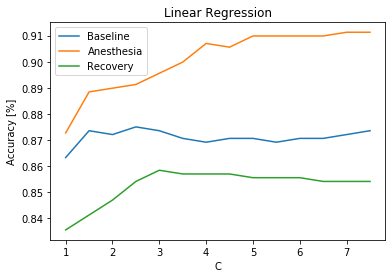

In [12]:
%matplotlib inline

plt.plot(cs,lr_accuracy_Base)
plt.plot(cs,lr_accuracy_Anes)
plt.plot(cs,lr_accuracy_Reco)
plt.ylabel('Accuracy [%]')
plt.xlabel('C')
plt.title('Linear Regression')
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.savefig('combined_LogReg_hyper.png',dpi=150)
plt.show()



NEW TRY 

In [13]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train_Base,Y_train_Base)
P_lr=clf.predict(X_test_Base)
print(clf.score(X_test_Base,Y_test_Base))

lr = AdaBoostClassifier(n_estimators=1000, random_state=0)
lr.fit(tmp_X_train_Base, tmp_Y_train_Base)
cv_LR_Base.append(lr.score(tmp_X_test_Base, tmp_Y_test_Base))


0.8661764705882353


NameError: name 'tmp_X_train_Base' is not defined

In [ ]:
lr.score(tmp_X_test_Base, tmp_Y_test_Base)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

cv_LR_Base=[]
cv_LR_Anes=[]
cv_LR_Reco=[]


for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        
        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        lr = AdaBoostClassifier(n_estimators=1000, random_state=0)
        lr.fit(tmp_X_train_Base, tmp_Y_train_Base)
        cv_LR_Base.append(lr.score(tmp_X_test_Base, tmp_Y_test_Base))
        
        lr = AdaBoostClassifier(n_estimators=1000, random_state=0)
        lr.fit(tmp_X_train_Anes, tmp_Y_train_Anes)
        cv_LR_Anes.append(lr.score(tmp_X_test_Anes, tmp_Y_test_Anes))
        
        lr = AdaBoostClassifier(n_estimators=1000, random_state=0)
        lr.fit(tmp_X_train_Reco, tmp_Y_train_Reco)
        cv_LR_Reco.append(lr.score(tmp_X_test_Reco, tmp_Y_test_Reco))
        

In [ ]:
plt.figure()
plt.plot(cv_LR_Base)
plt.plot(cv_LR_Anes)
plt.plot(cv_LR_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('combined_CV')
#plt.savefig('combined_LogRefg_CV.png',dpi=150)

In [ ]:
np.mean(cv_LR_Base)

In [ ]:
from sklearn.linear_model import LogisticRegression


cv_LR_Base=[]
cv_LR_Anes=[]
cv_LR_Reco=[]

FI_LR_Base=[]
FI_LR_Anes=[]
FI_LR_Reco=[]

for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        
        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        lr = LogisticRegression(random_state=0, penalty='l1', C=4,max_iter=1000,solver='liblinear')
        lr.fit(tmp_X_train_Base, tmp_Y_train_Base)
        P_lr = lr.predict(tmp_X_test_Base)
        cv_LR_Base.append(metrics.accuracy_score(tmp_Y_test_Base, P_lr))
        FI_LR_Base.append(lr.coef_)
        

        lr = LogisticRegression(random_state=0, penalty='l1', C=4,max_iter=1000,solver='liblinear')
        lr.fit(tmp_X_train_Anes, tmp_Y_train_Anes)
        P_lr = lr.predict(tmp_X_test_Anes)
        cv_LR_Anes.append(metrics.accuracy_score(tmp_Y_test_Anes, P_lr))
        FI_LR_Anes.append(lr.coef_)
        
        lr = LogisticRegression(random_state=0, penalty='l1', C=4,max_iter=1000,solver='liblinear')
        lr.fit(tmp_X_train_Reco, tmp_Y_train_Reco)
        P_lr = lr.predict(tmp_X_test_Reco)
        cv_LR_Reco.append(metrics.accuracy_score(tmp_Y_test_Reco, P_lr))
        FI_LR_Reco.append(lr.coef_)
        

In [ ]:
plt.figure()
plt.plot(cv_LR_Base)
plt.plot(cv_LR_Anes)
plt.plot(cv_LR_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('combined_CV')
plt.savefig('combined_LogRefg_CV.png',dpi=150)

In [ ]:
right_Anes = np.where(np.array(cv_LR_Anes) > 0.5)[0]
right_Base = np.where(np.array(cv_LR_Base) > 0.5)[0]
right_Reco = np.where(np.array(cv_LR_Reco) > 0.4)[0]



In [ ]:
len(FI_LR_Base)


In [ ]:
FI_LR_Base= list(FI_LR_Base[i] for i in right_Base)
FI_LR_Anes= list(FI_LR_Anes[i] for i in right_Anes)
FI_LR_Reco= list(FI_LR_Reco[i] for i in right_Reco)




In [ ]:
feat_importances_Base_LR = pd.Series(abs(np.mean(FI_LR_Base[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Anes_LR = pd.Series(abs(np.mean(FI_LR_Anes[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Reco_LR = pd.Series(abs(np.mean(FI_LR_Reco[0:],axis=0)[0]), index=X_Base.columns)


In [ ]:
plt.figure(figsize= [10, 6])
plt.subplot(121)
feat_importances_Base_LR.plot(kind='barh')
plt.title('LR_Baseline')
plt.subplot(122)
feat_importances_Anes_LR.plot(kind='barh',color='orange')
plt.title('Anesthesia')
plt.savefig('combined_LogRefg_features.png',dpi=150)
#plt.subplot(133)
#feat_importances_Reco_LR.plot(kind='barh',color='green')
#plt.title('Recovery')

In [ ]:
feat_importances_Base_LR = pd.Series(abs(np.mean(FI_LR_Base[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Anes_LR = pd.Series(abs(np.mean(FI_LR_Anes[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Reco_LR = pd.Series(abs(np.mean(FI_LR_Reco[0:],axis=0)[0]), index=X_Base.columns)


In [ ]:
plt.figure(figsize= [10, 6])
plt.subplot(121)
feat_importances_Base_LR.plot(kind='barh')
plt.title('LR_Baseline')
plt.subplot(122)
feat_importances_Anes_LR.plot(kind='barh',color='orange')
plt.title('Anesthesia')
plt.savefig('combined_LogRefg_features.png',dpi=150)
#plt.subplot(133)
#feat_importances_Reco_LR.plot(kind='barh',color='green')
#plt.title('Recovery')

In [ ]:
np.mean(cv_LR_Base)
np.std(cv_LR_Base)

np.mean(cv_LR_Anes)
np.std(cv_LR_Anes)

np.mean(cv_LR_Reco)
np.std(cv_LR_Reco)


SVM (sklearn)


In [ ]:
cs=np.arange(0.3,6,0.2)

svm_accuracy_Base=[]
svm_accuracy_Anes=[]
svm_accuracy_Reco=[]

for c in cs:
    svm_model = svm.LinearSVC(C=c, loss="hinge" , max_iter=100000)
    svm_model.fit(X_train_Base,Y_train_Base)
    P_lr=svm_model.predict(X_test_Base)
    svm_accuracy_Base.append(metrics.accuracy_score(Y_test_Base, P_lr))

    svm_model = svm.LinearSVC(C=c, loss="hinge", max_iter=100000)
    svm_model.fit(X_train_Anes,Y_train_Anes)
    P_lr=svm_model.predict(X_test_Anes)
    svm_accuracy_Anes.append(metrics.accuracy_score(Y_test_Anes, P_lr))

    svm_model = svm.LinearSVC(C=c, loss="hinge", max_iter=100000)
    svm_model.fit(X_train_Reco,Y_train_Reco)
    P_lr=svm_model.predict(X_test_Reco)
    svm_accuracy_Reco.append(metrics.accuracy_score(Y_test_Reco, P_lr))


In [ ]:

plt.plot(cs,svm_accuracy_Base)
plt.plot(cs,svm_accuracy_Anes)
plt.plot(cs,svm_accuracy_Reco)
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.title('Support Vector Machine')
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.show()
plt.savefig('combined_SVM_hyper.png',dpi=150)

In [ ]:
cv_SVM_Base=[]
cv_SVM_Anes=[]
cv_SVM_Reco=[]

FI_SVM_Base=[]
FI_SVM_Anes=[]
FI_SVM_Reco=[]


for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]

        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Base, tmp_Y_train_Base)
        P_lr = svm_model.predict(tmp_X_test_Base)
        cv_SVM_Base.append(metrics.accuracy_score(tmp_Y_test_Base, P_lr))
        FI_SVM_Base.append(svm_model.coef_.flatten())

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Anes, tmp_Y_train_Anes)
        P_lr = svm_model.predict(tmp_X_test_Anes)
        cv_SVM_Anes.append(metrics.accuracy_score(tmp_Y_test_Anes, P_lr))
        FI_SVM_Anes.append(svm_model.coef_.flatten())

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Reco, tmp_Y_train_Reco)
        P_lr = svm_model.predict(tmp_X_test_Reco)
        cv_SVM_Reco.append(metrics.accuracy_score(tmp_Y_test_Reco, P_lr))
        FI_SVM_Reco.append(svm_model.coef_.flatten())

In [ ]:
plt.plot(cv_SVM_Base)
plt.plot(cv_SVM_Anes)
plt.plot(cv_SVM_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('SVM')
plt.savefig('combined_SVM_CV.png',dpi=150)

In [ ]:
np.mean(cv_SVM_Base)

In [ ]:
np.std(cv_SVM_Base)

In [ ]:
np.mean(cv_SVM_Anes)

In [ ]:
np.std(cv_SVM_Anes)

In [ ]:
np.mean(cv_SVM_Reco)

In [ ]:
np.std(cv_SVM_Reco)

In [ ]:
right_Anes = np.where(np.array(cv_SVM_Anes) > 0.5)[0]
right_Base = np.where(np.array(cv_SVM_Base) > 0.5)[0]
right_Reco = np.where(np.array(cv_SVM_Reco) > 0.5)[0]


FI_SVM_Base=pd.DataFrame(FI_SVM_Base)
FI_SVM_Anes=pd.DataFrame(FI_SVM_Anes)
FI_SVM_Reco=pd.DataFrame(FI_SVM_Reco)

feat_importances_Base_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Base.iloc[right_Base,:],axis=0))), index=X_Base.columns)
feat_importances_Anes_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Anes.iloc[right_Anes,:],axis=0))), index=X_Base.columns)
feat_importances_Reco_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Reco.iloc[right_Reco,:],axis=0))), index=X_Base.columns)

feat_importances_Base_SVM = pd.Series(np.array((np.mean(FI_SVM_Base.iloc[right_Base,:],axis=0))), index=X_Base.columns)
feat_importances_Anes_SVM = pd.Series(np.array((np.mean(FI_SVM_Anes.iloc[right_Anes,:],axis=0))), index=X_Base.columns)
feat_importances_Reco_SVM = pd.Series(np.array((np.mean(FI_SVM_Reco.iloc[right_Reco,:],axis=0))), index=X_Base.columns)




In [ ]:
plt.figure(figsize= [10, 6])
plt.subplot(121)
feat_importances_Base_SVM_b.plot(kind='barh')
plt.title('SVM_Baseline')
plt.subplot(122)
feat_importances_Anes_SVM_b.plot(kind='barh',color='orange')
plt.title('Anesthesia')
plt.savefig('combined_SVM_features.png',dpi=150)
#plt.subplot(133)
#feat_importances_Reco_SVM_b.plot(kind='barh',color='green')
#plt.title('Recovery')

Decision Tree

In [ ]:
from sklearn import tree
import graphviz

#BAse
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Base,Y_out_Base)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_Base.columns, class_names=['Chronic', 'recovered'],
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('combined_Decision_Tree_Base')

#Anes
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Anes,Y_out_Anes)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_Base.columns, class_names=['Chronic', 'recovered'],
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('combined_Decision_Tree_Anes')



In [ ]:
data = [[np.max(lr_accuracy_Base), np.max(svm_accuracy_Base)], 
        [np.max(lr_accuracy_Anes), np.max(svm_accuracy_Anes)],
        [np.max(lr_accuracy_Reco), np.max(svm_accuracy_Reco)]]

pd.DataFrame(data, columns=["test_Logistic Regression", "test_SVM"],index=['Baseline','Anesthesia','Recovery'])

In [ ]:
data = [[np.mean(cv_LR_Base), np.mean(cv_SVM_Base)], 
        [np.mean(cv_LR_Anes), np.mean(cv_SVM_Anes)],
        [np.mean(cv_LR_Reco), np.mean(cv_SVM_Reco)]]

pd.DataFrame(data, columns=["test_Logistic Regression", "test_SVM"],index=['Baseline','Anesthesia','Recovery'])

In [18]:
from sklearn.neighbors import KNeighborsClassifier

cv_KNN_Base=[]
cv_KNN_Anes=[]
cv_KNN_Reco=[]

for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]

        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        neigh = KNeighborsClassifier(n_neighbors=300)
        neigh.fit(tmp_X_train_Base,tmp_Y_train_Base)
        P_KNN = neigh.predict(tmp_X_test_Base)
        cv_KNN_Base.append(metrics.accuracy_score(tmp_Y_test_Base, P_KNN))
        
        neigh = KNeighborsClassifier(n_neighbors=300)
        neigh.fit(tmp_X_train_Anes,tmp_Y_train_Anes)
        P_KNN = neigh.predict(tmp_X_test_Anes)
        cv_KNN_Anes.append(metrics.accuracy_score(tmp_Y_test_Anes, P_KNN))

        neigh = KNeighborsClassifier(n_neighbors=300)
        neigh.fit(tmp_X_train_Reco,tmp_Y_train_Reco)
        P_KNN = neigh.predict(tmp_X_test_Reco)
        cv_KNN_Reco.append(metrics.accuracy_score(tmp_Y_test_Reco, P_KNN))


In [19]:
np.mean(cv_KNN_Anes)

0.6879295532646048

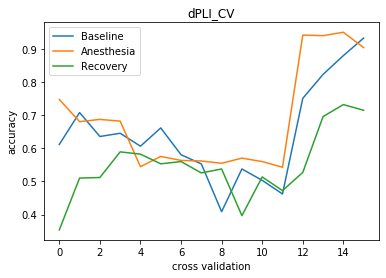

In [20]:
plt.plot(cv_KNN_Base)
plt.plot(cv_KNN_Anes)
plt.plot(cv_KNN_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('dPLI_CV')
plt.savefig('wPLI_LogRefg_CV.png',dpi=150)